In [16]:
!pip install ultralytics
!pip install opencv-python

In [20]:
import cv2
from ultralytics import YOLO
video_path = '/content/5825789-uhd_2160_3840_24fps.mp4'
cap = cv2.VideoCapture(video_path)


In [21]:
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

print(width)
print(height)
print(fps)


2160
3840
23


In [22]:


thickness = 1
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_thickness = 4
count_scale = 1
count_color = (0, 0, 255)

In [23]:
ret, frame = cap.read()




WARNING ⚠️ NMS time limit 0.550s exceeded
0: 640x384 2 Humans, 79.7ms
Speed: 14.2ms preprocess, 79.7ms inference, 669.3ms postprocess per image at shape (1, 3, 640, 384)


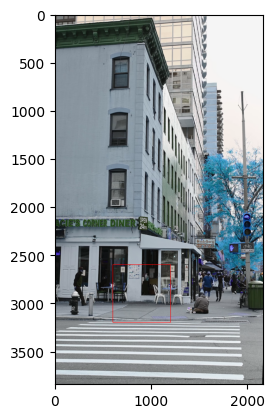

In [24]:
region_points = cv2.rectangle(frame,(600,2600),(1200,3200),(255,0,0),3,thickness)
plt.imshow(frame)

In [25]:

output_path = '/content/group5.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

In [28]:
import cv2
from ultralytics import YOLO

color_no_people = (0, 255, 0)
color_two_or_more = (0, 0, 255)

model = YOLO('/content/yolov8x.pt')

rect_x1, rect_y1, rect_x2, rect_y2 = 600, 2600, 1200, 3200

cap = cv2.VideoCapture('/content/5825789-uhd_2160_3840_24fps.mp4')

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('/content/out_group5.mp4', fourcc, 24.0, (int(cap.get(3)), int(cap.get(4))))

person_class_id = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model.track(frame, persist=True, show=False)

    people_count = 0

    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()
        class_ids = result.boxes.cls.cpu().numpy()
        confidences = result.boxes.conf.cpu().numpy()

        for box, conf, class_id in zip(boxes, confidences, class_ids):
            if int(class_id) == person_class_id:
                x1, y1, x2, y2 = map(int, box)
                center = ((x1 + x2) // 2, (y1 + y2) // 2)

                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                label = f'{model.names[int(class_id)]} :{conf:.2f}'
                cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

                if rect_x1 <= center[0] <= rect_x2 and rect_y1 <= center[1] <= rect_y2:
                    people_count += 1

    rectangle_color = color_no_people if people_count < 2 else color_two_or_more

    cv2.rectangle(frame, (rect_x1, rect_y1), (rect_x2, rect_y2), rectangle_color, 3)
    cv2.putText(frame, f'People Count: {people_count}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    out.write(frame)

cap.release()
out.release()
cv2.destroyAllWindows()


0: 640x384 6 persons, 1 bicycle, 1 traffic light, 1 fire hydrant, 4 chairs, 1 dining table, 64.8ms
Speed: 2.7ms preprocess, 64.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 6 persons, 1 bicycle, 1 traffic light, 1 fire hydrant, 4 chairs, 1 dining table, 35.7ms
Speed: 5.2ms preprocess, 35.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 6 persons, 1 bicycle, 2 traffic lights, 1 fire hydrant, 4 chairs, 1 dining table, 35.3ms
Speed: 3.3ms preprocess, 35.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 6 persons, 1 bicycle, 2 traffic lights, 1 fire hydrant, 4 chairs, 1 dining table, 35.4ms
Speed: 3.5ms preprocess, 35.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 6 persons, 1 bicycle, 2 traffic lights, 1 fire hydrant, 4 chairs, 1 dining table, 35.2ms
Speed: 3.9ms preprocess, 35.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 

In [ ]:

from google.colab import files

files.download(new_vid)
